# *scotch* for Markov Processes
<br /> 
### Quentin Caudron
#### github.com/QCaudron
#### @QuentinCaudron
<br />
#### PyLadies Vancouver, 7 March 2016

## What are stochastic processes ?

A stochastic process is something that changes over time in a *non-deterministic* manner : it follows a general set of rules, but there's uncertainty, or noise, in the system.

- The **arrival of people in a cafe** is a stochastic process. There are spikes in the morning and after lunch, but we're uncertain as to exactly how many people are there at any given time.
- **The weather** is a stochastic process : it can't rain forever, but we're not quite sure when it'll stop. Thanks, Vancouver...

### Markov processes

Stochastic processes are *Markovian* if their future states ( or, specifically, the probability distributions of their future states ) depend only on the current state of the system.

In Snakes and Ladders, only the **current state of the board** matters to where we can go next. Roll the dice and move your piece. It doesn't matter how you got to where you are. This game has the Markov property.

In blackjack, **the cards showing on the board aren't sufficient** - if you can count cards, you have additional information. Blackjack is a non-Markovian stochastic process.

![scotch](scotch.jpg)

### scotch

`github.com/QCaudron/scotch/`

`scotch.readthedocs.org`

In [ ]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
C = sns.color_palette("deep", 8)

mpl.rcParams["figure.figsize"] = (10, 4)

#### scotch :  sampling realisations of stochastic processes
The Susceptible-Infected-Recovered disease model

In [14]:
import scotch

model = scotch.model("sir.json")

scotch model with 3 states, 2 parameters, and 2 events.

States :
S, initial condition = 99
I, initial condition = 1
R, initial condition = 0

Parameters :
r0 = 18
gamma = 1/14



In [3]:
model

rate r0 * gamma * S * I / (S+I+R)
rate gamma * I

In [4]:
print model

scotch model with 3 states, 2 parameters, and 2 events.

States :
S, initial condition = 99
I, initial condition = 1
R, initial condition = 0

Parameters :
r0 = 18
gamma = 1/14



[                         ]-----------------------

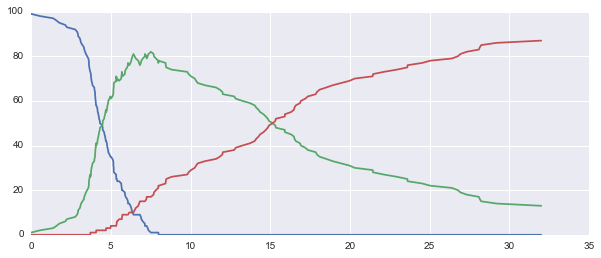

In [5]:
# Sample a realisation from the model, terminating at 30 days
t, trace = model.simulate(30)

# Plot the realisation
plt.plot(t, trace)

[                         ]-----No more possible events, stopping early !


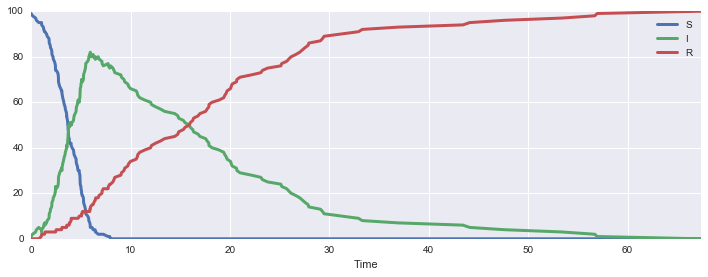

In [6]:
# Let's look at another realisation.
# We'll call scotch's convenience function, plot().
model.plot(300)

#### scotch : tau-leaping and mean behaviour
The Lotka-Volterra predator-prey model

In [16]:
model = scotch.model("lotka_volterra.json")

scotch model with 2 states, 4 parameters, and 4 events.

States :
B, initial condition = 100
F, initial condition = 100

Parameters :
alpha = 0.3
beta = 0.0025
gamma = 0.2
delta = 0.0015



The Gillespie algorithm is exact, but it can be slow. **scotch** implements tau-leaping, a much faster, but approximate, simulation algorithm.

In [17]:
%%timeit 

samples = model.sample(60, silent=True)

1 loop, best of 3: 50.5 s per loop


In [9]:
%%timeit

samples = model.sample(60, silent=True, algorithm="tauLeap", tau=0.5)

1 loop, best of 3: 1.32 s per loop


Sampling trajectories.
[                         ]------------------------

Bootstrapping.
[                         ]------------

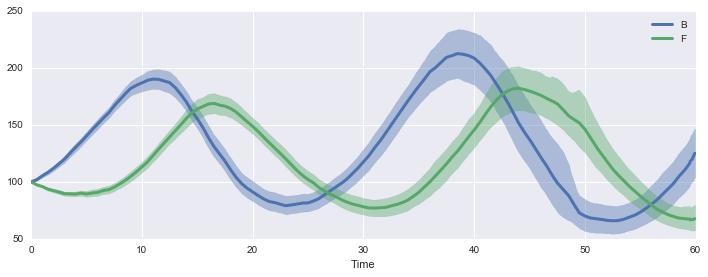

In [10]:
# scotch also provides a convenience function for trajectory sampling.
model.plotsamples(60, algorithm="tauLeap", tau=0.5)

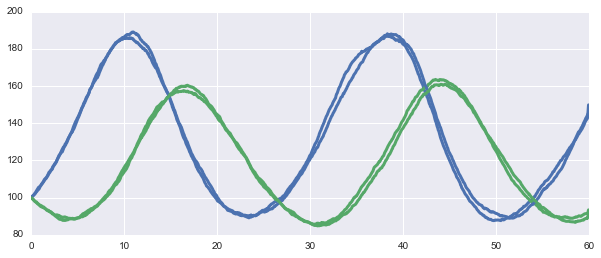

In [19]:
# How do they compare ?
t_SSA, trace_SSA, up_SSA, down_SSA = model.sample(60, silent=True)
t_tau, trace_tau, up_tau, down_tau = model.sample(60, algorith="tauLeap", tau=0.5, silent=True)

plt.plot(t_SSA, trace_SSA["B"], c=C[0], lw=3)
plt.plot(t_SSA, trace_SSA["F"], c=C[1], lw=3)
plt.plot(t_tau, trace_tau["B"], c=C[0], lw=3)
plt.plot(t_tau, trace_tau["F"], c=C[1], lw=3)

#### scotch : using the Wizard to easily write models
The discrete mean-reverting process

In [ ]:
model = scotch.model()
model.wizard()

In [ ]:
model.plot(3000, negative_rates=True)

### scotch

`github.com/QCaudron/scotch/`

`scotch.readthedocs.org`